### Metric methods for a regression problem

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from collections import OrderedDict


### Naive approach - KNN for regression

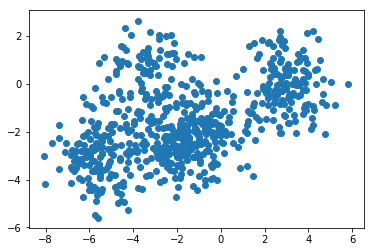

In [2]:
np.random.seed(37)
X = np.vstack(((np.random.randn(150, 2)  + np.array([3, 0])),
               (np.random.randn(100, 2)  + np.array([-3.5, 0.5])),
               (np.random.randn(100, 2) + np.array([-0.5, -2])),
               (np.random.randn(150, 2) + np.array([-2, -2.5])),
               (np.random.randn(150, 2) + np.array([-5.5, -3]))))
#X = np.hstack([data,np.random.randint(0,2,650).reshape(-1,1)])
plt.scatter(X[:,0],X[:,1])

train,test = train_test_split(X)
X_tr,Y_tr = train[:,0],train[:,1]
X_t,Y_t = test[:,0],test[:,1]

In [55]:
class KNN_regression(object):
    """
    KNN for regression
    
    Arguments:
    ---------
    k -- number of nearest neighbours
    X -- input matrix
    """
    
    def split_data(self):
        train,test = train_test_split(self.X)
        self.X_train,self.X_test = train[:,0],test[:,0]
        self.Y_train,self.Y_test = test[:,1],test[:,1]

    
    def __init__(self,k,X = None, X_train=None, X_test = None, Y_train = None, Y_test = None):
        self.k = k
        if X is None:
            self.X_train, self.X_test  = X_train, X_test
            self.Y_train, self.Y_test  = Y_train, Y_test
        else:
            self.X = X
            self.split_data()
    
    def euclidean_dist(self,x,y):
        """
        euclidean distance between points x and y
        """
        if type(x)==np.float64:
            return (((y-x)**2)**0.5)
        return sum((y[i]-x[i])**2 for i in range(len(x)))**0.5
      
    def predict_average(self,distances):
        return np.mean(distances)
    
    def get_Neighbours(self,point):
        """
        Arguments:
        ---------
        point -- chosen point from X_test
        
        Returns:
        ------
        list of k closest neighbours [[distance,index],...]
        """
        distances = {self.euclidean_dist(self.X_train[i],point):i for i in range(len(self.X_train))}
        distances = OrderedDict(sorted(distances.items()))
        
        k_nearest = list(distances.items())[:self.k]
        return [row[0] for row in k_nearest]

    def predict(self):
        prediction = []
        for point in self.X_test:
            #get k neighbours
            neighbours = self.get_Neighbours(point)
            #predict price based on their values
            prediction.append(self.predict_average(neighbours))
        self.pred = np.array(prediction)
        return self.pred
    
    
    def calculate_accuracy(self):
        return mean_squared_error(self.Y_test,self.pred)
    
    def visualize(self):
        plt.figure(figsize=(20,10))
    
        plt.plot(self.X_train,self.Y_train,'ro',label='train points')
        plt.plot(self.X_test,self.Y_test,'go',label='test points')
        plt.plot(self.X_test,self.pred,'bo',label='preduicted points')
    
    
        plt.legend()
        plt.show()

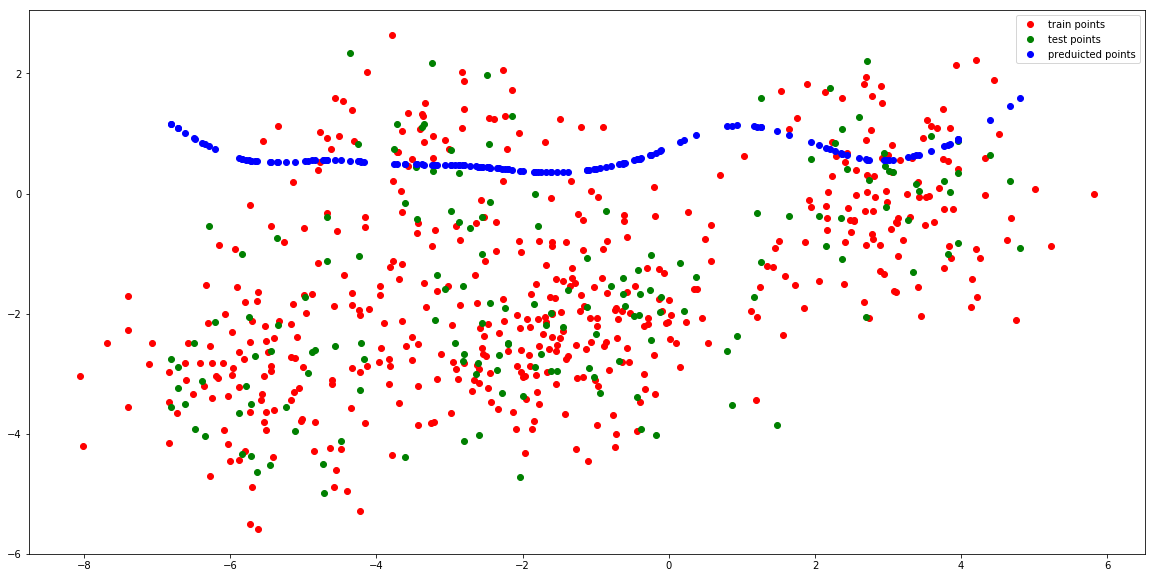

In [65]:
model = KNN_regression(100,X_train=X_tr,X_test=X_t,Y_train=Y_tr,Y_test=Y_t)
prediction = model.predict()
model.calculate_accuracy()
model.visualize()

In [72]:
def GD_fit(X,Y,l=0.0001,epochs = 1000):
    """
    Arguments:
    l -- learning rate
    epochs -- number of iterations
    X -- training set of X
    Y -- training set of Y
    Output:
    m,b -- params of Y = m*X+b - m is the slope, b is the intercept
    """
    n,m,b =len(X),0,0 #initial values
     
    for i in range(epochs):
        Y_pred = [m*x_i+b for x_i in X]
        D_m = (-2/n) * sum(x_i *(y_i-y_pred_i) for x_i,y_i,y_pred_i in zip(X,Y,Y_pred))
        D_b = (-2/n) * sum(y-y_i for y,y_i in zip(Y,Y_pred))
        m-=l*D_m
        b-=l*D_b
    return m,b


def GD_predict(x,m,b):
    return m*x + b


def test_GD(X_train,Y_train,X_test,Y_test):
    m,b = GD_fit(X_train,Y_train,0.001,1200)
    pred = np.array([GD_predict(i,m,b) for i in X_test])
    loss = mean_squared_error(Y_test,pred)
    print("loss = {0}".format(loss))
    visualize(X_train,Y_train,X_test,Y_test,Y_pred=pred)

loss = 2.293682039391939


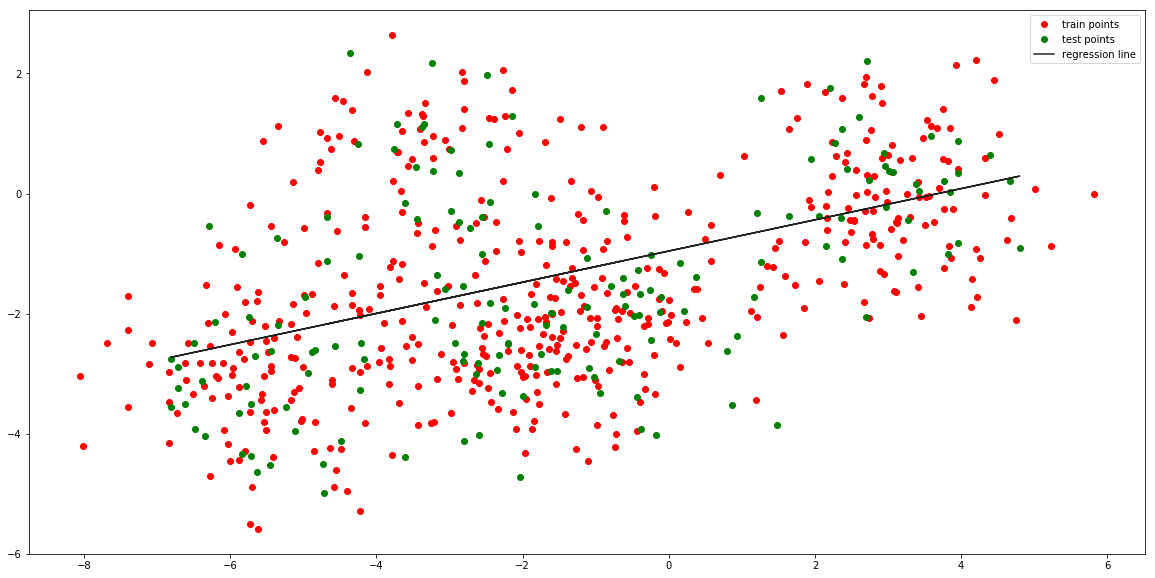

In [73]:
test_GD(X_tr,Y_tr,X_t,Y_t)

In [6]:
def visualize(X,Y,X_test,Y_test,Y_pred=[]):
    plt.figure(figsize=(20,10))
    
    plt.plot(X,Y,'ro',label='train points')
    plt.plot(X_test,Y_test,'go',label='test points')
    
    if type(Y_pred)==np.ndarray:
        plt.plot(X_test,Y_pred,'#222222',label = 'regression line')
    
    plt.legend()
    plt.show()